# Author: Sejal Pol

### Objective : In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


## Importing required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
#Importing dataset
data=pd.read_csv("http://bit.ly/w-data")
print("Data has been succesfully imported!")
data

Data has been succesfully imported!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.isnull().sum() 

Hours     0
Scores    0
dtype: int64

### NO NULL values in the dataset

## Data Visualization

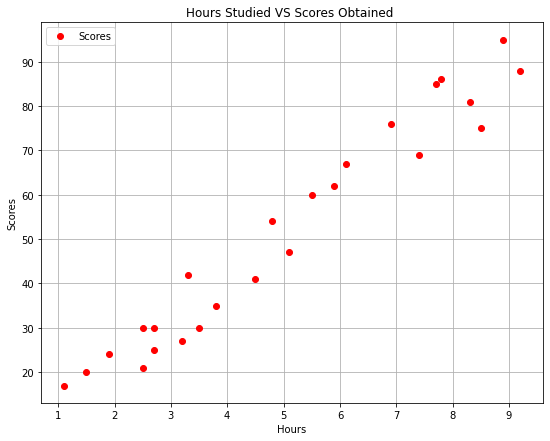

In [10]:
data.plot(x='Hours', y='Scores', style ='ro',figsize=(9,7))  
plt.title('Hours Studied VS Scores Obtained ')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.grid()

**By seeing the graph, it can be assumed that there is a positive relationship between the number of hours studied and the percentage score**

In [11]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

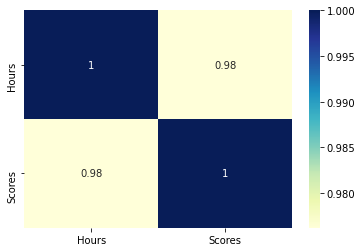

In [12]:
sns.heatmap(data.corr(method="pearson"),annot=True,cmap="YlGnBu")

## Data Preprocessing
This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [13]:
x=data["Hours"].values
y=data["Scores"].values

## Model Training.
Splitting the data into training and testing sets, and training the algorithm

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
lr=LinearRegression()
lr.fit(x_train.reshape(-1,1), y_train) 
print("Training completed")

Training completed


### LR model equation:  y = b0 + b1*x
where b0=intercept and b1=slope

In [15]:
print('b0=',lr.intercept_)
print('b1=',lr.coef_)

b0= 2.018160041434662
b1= [9.91065648]


### Our model eq : Scores = 2.018160041434683 + 9.91065648 * Hours

## Plotting Regression Line. 

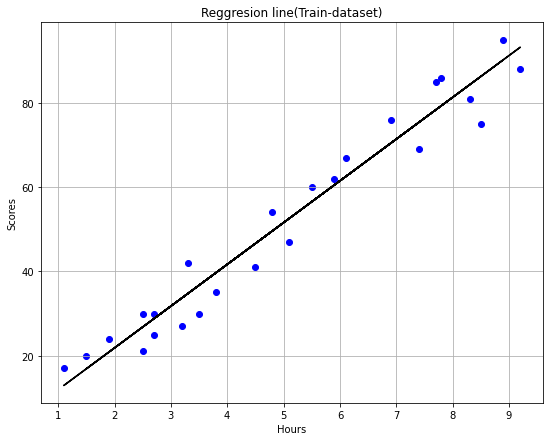

In [17]:
#Visualizing the best fit line of Regression.
line = lr.intercept_+ lr.coef_*x
plt.figure(figsize=(9,7))
plt.scatter(x,y,color='blue')
plt.plot(x,line,color='black')
plt.title('Reggresion line(Train-dataset)')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.grid()

## Making Predictions.
Predict the value for test dataset

In [19]:
print(x_test)
y_pred = lr.predict(x_test.reshape(-1,1))

[1.5 3.2 7.4 2.5 5.9]


In [20]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

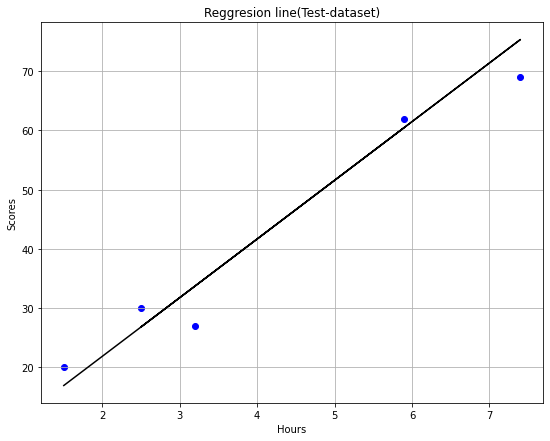

In [24]:
line2 = lr.intercept_+ lr.coef_*x_test.reshape(-1,1)
plt.figure(figsize=(9,7))
plt.scatter(x_test.reshape(-1,1),y_test,color='blue')
plt.plot(x_test.reshape(-1,1),line2,color='black')
plt.title('Reggresion line(Test-dataset)')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.grid()

In [25]:
#Dataframe that compares actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


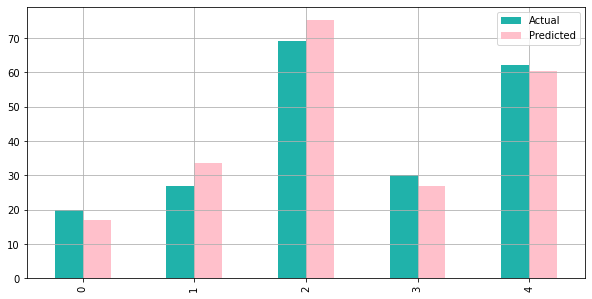

In [26]:
df.plot(kind ='bar',figsize=(10,5),color=['lightseagreen','pink'])
plt.grid()

In [27]:
# Testing the model with our own data
hours = 9.25
test= np.array([hours]).reshape(-1,1)
sc =lr.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(sc[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluating the model

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.**

In [28]:
#Estimating training and test score
print("Training Score:",lr.score(x_train.reshape(-1,1),y_train))
print("Test Score:",lr.score(x_test.reshape(-1,1),y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


In [29]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R^2: 0.9454906892105354


###### Here, the R-squared value is approximately 0.94, which means that 94% variability is explained of the response variable(Scores). We can conclude from this that the model is a good fit.